# NLP Project - Yash Pratap Solanky

## Sentiment Analysis of Amazon Electronics Reviews 

In [9]:
# Out of all the categories of data available on https://nijianmo.github.io/amazon/index.html, I opted to work with the 
# electronics data as I was most interesed to see the sentiment analysis results of this category

In [21]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Electronics_5.json.gz')
# Reference - https://nijianmo.github.io/amazon/index.html

In [22]:
from nltk.corpus import sentiwordnet as swn 
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk

In [23]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


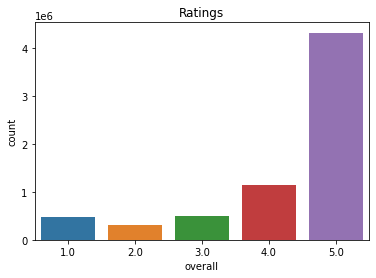

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Ratings")
sns.countplot(df.overall)

In [136]:
# There are mostly 5.0 ratings, so we would expect to see more positive reviews

In [27]:
df = df[df.verified != "False"]
# Droping the non verified reviews as they tend to be fake. 

C:\Users\yashp\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739590 entries, 0 to 6739589
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   vote            object 
 2   verified        bool   
 3   reviewTime      object 
 4   reviewerID      object 
 5   asin            object 
 6   style           object 
 7   reviewerName    object 
 8   reviewText      object 
 9   summary         object 
 10  unixReviewTime  int64  
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 623.5+ MB


In [29]:
df = df[["reviewerID","reviewText","summary"]]
#We do not need the rest of the columns for sentiment analysis

In [30]:
df.head()

,reviewerID,reviewText,summary
0,AAP7PPBU72QFM,This is the best novel I have read in 2 or 3 y...,A star is born
1,A2E168DTVGE6SV,"Pages and pages of introspection, in the style...",A stream of consciousness novel
2,A1ER5AYS3FQ9O3,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...
3,A1T17LMQABMBN5,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!
4,A3QHJ0FXK33OBE,I was taken in by reviews that compared this b...,A dissenting view--In part.


In [31]:
df1 = df.sample(10000)
# We take a sample of 10,000 rows due to memory limitation

In [32]:
df1.head()

,reviewerID,reviewText,summary
4532909,A38STL750JQ45W,This device is great for recording your drivin...,A New Way to Keep Tabs on Your Teenager's Driv...
4823124,A1DS866K7Y4GKW,"I rarely find in-ear headphones comfortable, b...","I rarely find in-ear headphones comfortable, b..."
4493642,A272U1LZNSV45S,Our first Apple desktop. Our kids all have one...,Apple desktop
4362676,A25W36DPN3NBBC,This is a nice high quality cable. Works exac...,Nice high quality cable
2520506,AAQW4RZEJNDN8,Fair deal,Three Stars


In [33]:
df1.reset_index(inplace =True)

In [34]:
# Sample review:

In [92]:
df1.reviewText[0]

"This device is great for recording your driving, or that of your teenage son. Easy to install it uses your auxilary power plug or cigarette lighter from your car for power. Should you be in an accident you can use the video to show who is at fault or who isn't. Eight hours of recording can be watched on your computer using a usb cord. The soft ware for watching the video comes on a mini CD. Rom. This is smaller than a regular cd, and has at times gotten stuck in computers. A better option is to download the software on line from the product website. The software can be found there under support. I also found the customer service of this company  to be incredibly friendly and helpful. They answer promptly and are very knowledgeable concerning their product."

In [93]:
# We break every review into tokens, turn it into lowercase

In [94]:
tokenized_list = []
for i in df1.reviewText:
    tokens = nltk.tokenize.word_tokenize(str(i))
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()
    tokenized_list.append(tokens)
print(tokenized_list[0])

['this', 'device', 'is', 'great', 'for', 'recording', 'your', 'driving', ',', 'or', 'that', 'of', 'your', 'teenage', 'son', '.', 'easy', 'to', 'install', 'it', 'uses', 'your', 'auxilary', 'power', 'plug', 'or', 'cigarette', 'lighter', 'from', 'your', 'car', 'for', 'power', '.', 'should', 'you', 'be', 'in', 'an', 'accident', 'you', 'can', 'use', 'the', 'video', 'to', 'show', 'who', 'is', 'at', 'fault', 'or', 'who', 'is', "n't", '.', 'eight', 'hours', 'of', 'recording', 'can', 'be', 'watched', 'on', 'your', 'computer', 'using', 'a', 'usb', 'cord', '.', 'the', 'soft', 'ware', 'for', 'watching', 'the', 'video', 'comes', 'on', 'a', 'mini', 'cd', '.', 'rom', '.', 'this', 'is', 'smaller', 'than', 'a', 'regular', 'cd', ',', 'and', 'has', 'at', 'times', 'gotten', 'stuck', 'in', 'computers', '.', 'a', 'better', 'option', 'is', 'to', 'download', 'the', 'software', 'on', 'line', 'from', 'the', 'product', 'website', '.', 'the', 'software', 'can', 'be', 'found', 'there', 'under', 'support', '.', 'i'

In [95]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [96]:
# We then remove stopwords

In [97]:
final_list = []
for words in tokenized_list:
    temp_list = []
    for word in words:
        if word not in stop:
            temp_list.append(word)
    final_list.append(temp_list)

In [98]:
# Sample of the revierw after all the pre processing

In [99]:
print(final_list[0])

['device', 'great', 'recording', 'driving', ',', 'teenage', 'son', '.', 'easy', 'install', 'uses', 'auxilary', 'power', 'plug', 'cigarette', 'lighter', 'car', 'power', '.', 'accident', 'use', 'video', 'show', 'fault', "n't", '.', 'eight', 'hours', 'recording', 'watched', 'computer', 'using', 'usb', 'cord', '.', 'soft', 'ware', 'watching', 'video', 'comes', 'mini', 'cd', '.', 'rom', '.', 'smaller', 'regular', 'cd', ',', 'times', 'gotten', 'stuck', 'computers', '.', 'better', 'option', 'download', 'software', 'line', 'product', 'website', '.', 'software', 'found', 'support', '.', 'also', 'found', 'customer', 'service', 'company', 'incredibly', 'friendly', 'helpful', '.', 'answer', 'promptly', 'knowledgeable', 'concerning', 'product', '.']


In [100]:
sentiments = []
for i in range(0,10000):
    sent = TextBlob(str(final_list[i]))
    sentiments.append(sent.sentiment.polarity)

In [101]:
# The review wise polarity:

In [102]:
sentiments

[0.2760416666666667,
 0.33809523809523806,
 0.3875,
 0.22,
 0.7,
 0.15158730158730163,
 0.26,
 0.4,
 0.65,
 0.25,
 0.05226449275362318,
 0.051268796992481186,
 0.48000000000000004,
 0.8,
 0.21041666666666667,
 0.24666666666666667,
 0.3,
 0.09771062271062271,
 0.15199095547309835,
 0.16875,
 0.4,
 0.24660524160524167,
 0.8,
 0.0,
 0.6,
 -0.24999999999999992,
 0.5208333333333334,
 0.24637681159420283,
 0.14404761904761904,
 -0.037500000000000006,
 0.0,
 0.5472222222222222,
 0.5,
 0.4343434343434343,
 -0.24999999999999992,
 1.0,
 0.29814814814814816,
 0.7,
 0.3444444444444444,
 0.3357142857142857,
 0.0,
 0.25,
 0.3499999999999999,
 1.0,
 0.25,
 1.0,
 0.39999999999999997,
 0.23611111111111113,
 0.0,
 0.35,
 0.046946169772256734,
 0.8,
 0.5035714285714287,
 0.4055555555555556,
 0.275,
 0.0,
 0.55,
 0.55,
 0.2708333333333333,
 -0.012682629870129872,
 0.30625,
 0.33999999999999997,
 0.23205128205128206,
 0.4261904761904762,
 0.005555555555555564,
 0.05000000000000001,
 0.275,
 0.55625,
 0.566

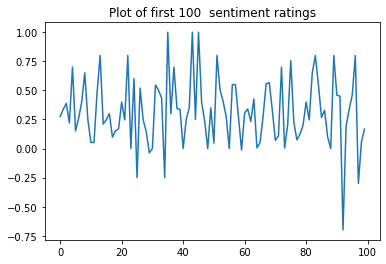

In [103]:
plt.title("Plot of first 100  sentiment ratings")

plt.plot(sentiments[:100])

In [104]:
# We can observe that the sentiment is mainly positive (>0)

In [105]:
sum(sentiments)/10000

0.3122770330871738

### Total overall polarity = 0.3122770330871738
#### As the total overall polarity is positive, it means that the reviews have a positive sentiment overall

In [106]:
pos = []
neg = []
neu = []
for i in sentiments:
    if i < 0:
        neg.append(i)
    elif i>0:
        pos.append(i)
    else:
        neu.append(i)

In [107]:
print("Length of positive reviews is: " + str(len(pos)))

Length of positive reviews is: 8282


In [108]:
print("Length of negative reviews is: "+ str(len(neg)))

Length of negative reviews is: 770


In [109]:
print("Length of neutral reviews is: "+ str(len(neu)))

Length of neutral reviews is: 948


In [64]:
# Here we can observe that the number of positive reviews is much more than the number of negative and neutral reviews

In [65]:
from matplotlib.pyplot import figure

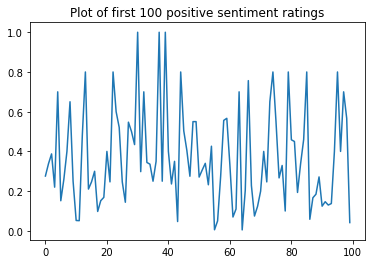

In [110]:
plt.title("Plot of first 100 positive sentiment ratings")

plt.plot(pos[:100])

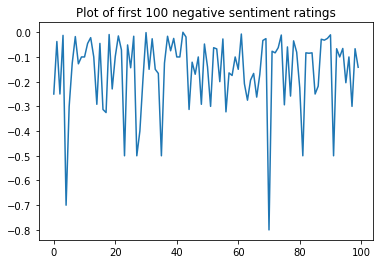

In [111]:
plt.title("Plot of first 100 negative sentiment ratings")

plt.plot(neg[:100])

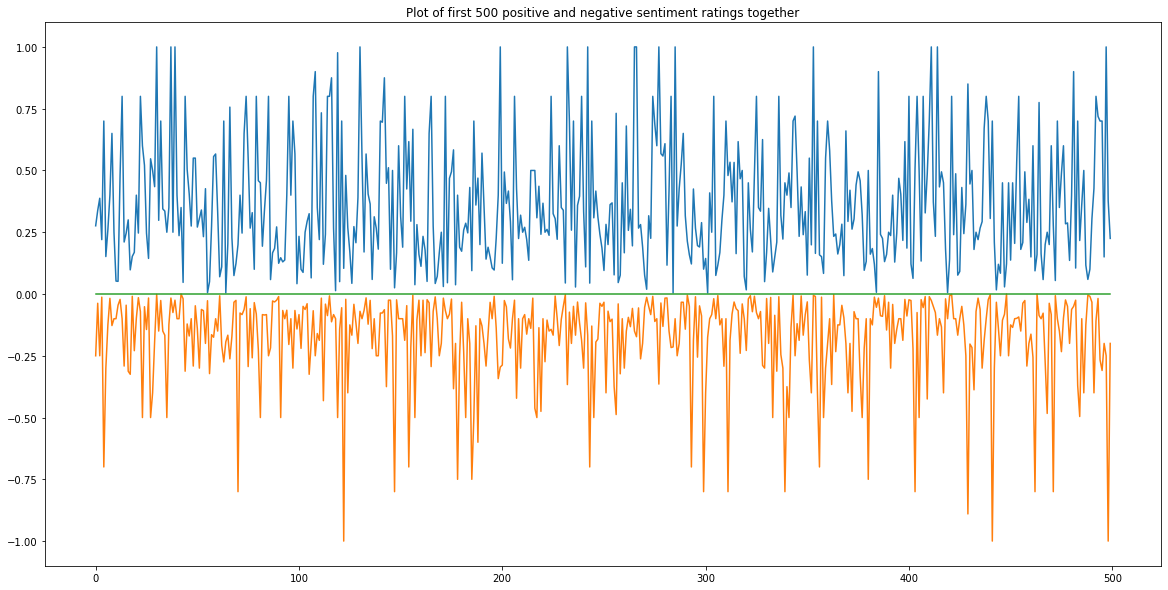

In [113]:
figure(figsize=(20, 10))
plt.plot(pos[:500])
plt.plot(neg[:500])
plt.plot(neu[:500])
plt.title("Plot of first 500 positive and negative sentiment ratings together")
plt.show()

In [114]:
# We will now try obtaining the sentiment score using NaiveBayesAnalyzer

In [115]:
from textblob.sentiments import NaiveBayesAnalyzer

In [116]:
sentiments = []
for i in range(0,10):
    sent = TextBlob(str(final_list[i]),analyzer = NaiveBayesAnalyzer())
    sentiments.append(sent.sentiment)

In [117]:
sentiments[0]

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)

In [118]:
sum(map(lambda x: x[1], sentiments))/10 + sum(map(lambda x: x[2], sentiments))/10

1.0

In [134]:
# The NaiveBayesAnalyzer gave an equal score of positive and negative (0.5) to the first 10 rows

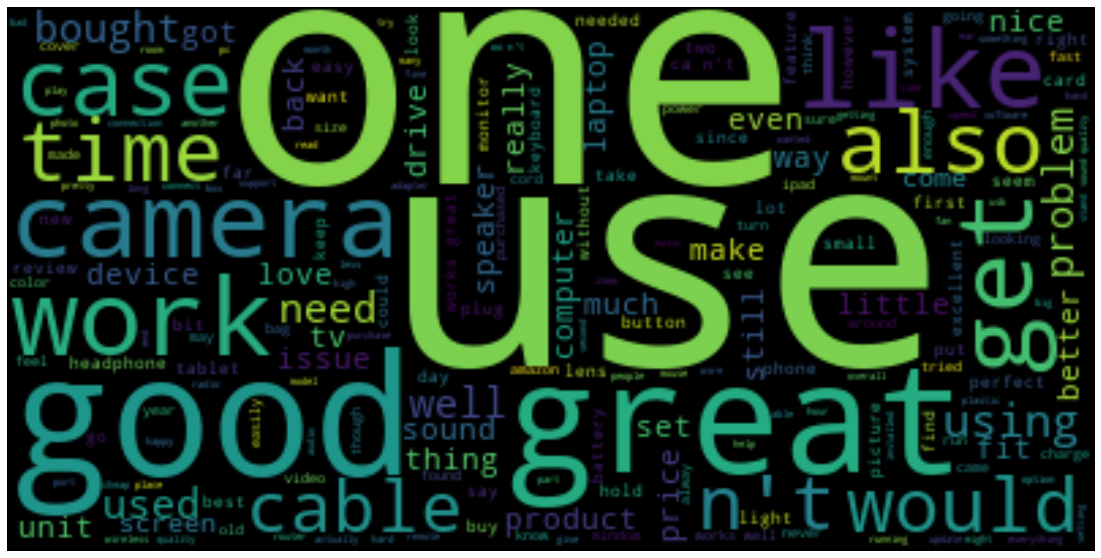

In [119]:
from wordcloud import WordCloud 
figure(figsize=(20, 10))
wc = ""
for i in final_list:
    for j in i:
        wc = wc+" "+ j
#print(textt)
stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_words).generate(wc)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# reference - https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [120]:
word_count = {}
for i in wc:
    if i[0] in word_count.keys():
        word_count[i[0]] = word_count[i[0]] + 1
    else:
        word_count[i[0]] = 1

In [121]:
print(word_count)

{' ': 414578, 'd': 78570, 'e': 230866, 'v': 24175, 'i': 117411, 'c': 74979, 'g': 53935, 'r': 122314, 'a': 127692, 't': 134912, 'o': 126498, 'n': 110745, ',': 21027, 's': 127630, '.': 45039, 'y': 34265, 'l': 100031, 'u': 62189, 'x': 6687, 'p': 60734, 'w': 31305, 'h': 44633, 'f': 26702, "'": 14888, 'm': 49253, 'b': 32497, 'k': 26526, '-': 8175, 'q': 3433, '(': 2791, ')': 2981, '2': 3603, ':': 1294, 'z': 3001, '3': 2653, '0': 6812, 'j': 1795, '9': 827, '1': 4093, '5': 2759, '&': 446, '!': 3576, '/': 2453, '4': 2099, '8': 1367, '+': 437, '6': 1439, '`': 1875, '=': 1019, '7': 1265, '%': 247, ';': 492, '<': 289, '_': 635, '?': 621, '>': 301, '$': 699, '[': 44, ']': 49, '*': 542, '~': 47, '\\': 7, '@': 26, '#': 58, '|': 1, '{': 2, '}': 2, '\x7f': 1, '^': 2, '\x10': 1}


## Lets try out sentiment analysis on Summary of the review

In [122]:
df1.summary[0]

"A New Way to Keep Tabs on Your Teenager's Driving!"

In [123]:
tokenized_list = []
for i in df1.summary:
    tokens = nltk.tokenize.word_tokenize(str(i))
    for j in range(len(tokens)):
        tokens[j] = tokens[j].lower()
    tokenized_list.append(tokens)
print(tokenized_list[0])

['a', 'new', 'way', 'to', 'keep', 'tabs', 'on', 'your', 'teenager', "'s", 'driving', '!']


In [124]:
final_list = []
for words in tokenized_list:
    temp_list = []
    for word in words:
        if word not in stop:
            temp_list.append(word)
    final_list.append(temp_list)

In [125]:
sentiments = []
for i in range(0,10000):
    sent = TextBlob(str(final_list[i]))
    sentiments.append(sent.sentiment.polarity)

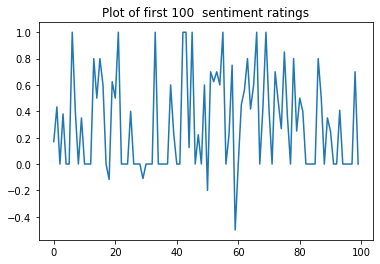

In [126]:
plt.title("Plot of first 100  sentiment ratings")

plt.plot(sentiments[:100])

In [127]:
sum(sentiments)/10000

0.28964453975294596

### Total overall polarity = 0.28964453975294596
#### As the total overall polarity is positive, it means that the summaries have a positive sentiment overall

In [128]:
pos = []
neg = []
neu = []
for i in sentiments:
    if i < 0:
        neg.append(i)
    elif i>0:
        pos.append(i)
    else:
        neu.append(i)

In [129]:
print("Length of positive reviews is: " + str(len(pos)))

Length of positive reviews is: 5055


In [130]:
print("Length of negative reviews is: "+ str(len(neg)))

Length of negative reviews is: 564


In [ ]:
print("Length of neutral reviews is: "+ str(len(neu)))

In [90]:
# We observe that in review summaries, there is almost an equal split of positive and negative summaries

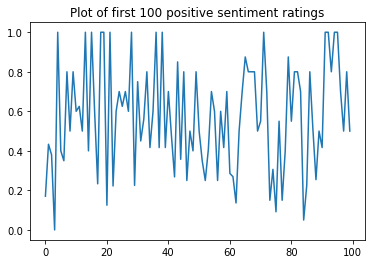

In [131]:
plt.title("Plot of first 100 positive sentiment ratings")

plt.plot(pos[:100])

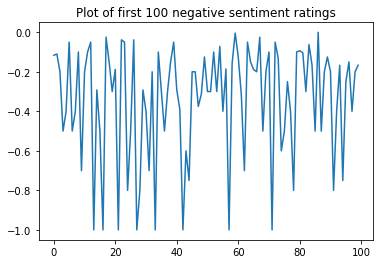

In [132]:
plt.title("Plot of first 100 negative sentiment ratings")

plt.plot(neg[:100])

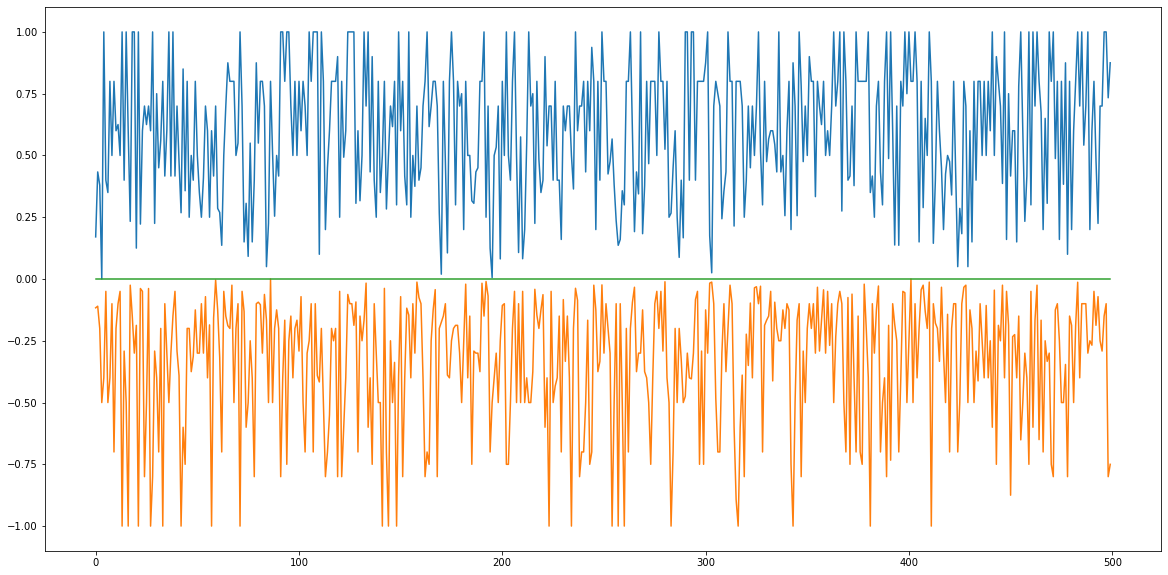

In [133]:
figure(figsize=(20, 10))
plt.plot(pos[:500])
plt.plot(neg[:500])
plt.plot(neu[:500])
plt.show()

In [135]:
# We can observe that negative scores have a tendency to be close to neutral, whereas the positive scores are really positive. 